In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

bulk = torch.load('../result/Metabric_20241010_150720/bulk_tensor.pt', map_location=torch.device('cpu'))
bulk

,0,1,2,3,4,5,6,7,8,9,...,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077
MB-0000,0.092512,0.387382,0.078510,0.270064,0.928755,0.540982,0.691699,0.206318,0.383952,0.583730,...,0.724258,0.278423,0.207076,0.204617,0.138596,0.082305,0.638327,0.920266,0.157476,0.125781
MB-0002,0.142282,0.477890,0.537003,0.142403,0.790026,0.317323,0.646411,0.053111,0.494134,0.236157,...,0.599899,0.125475,0.500085,0.213769,0.066205,0.503071,0.073051,0.230672,0.084620,0.149032
MB-0005,0.185392,0.303283,0.409110,0.097579,0.429897,0.306600,0.405488,0.147458,0.305984,0.573965,...,0.693659,0.256038,0.438311,0.193776,0.159844,0.117722,0.221107,0.257986,0.197748,0.090733
MB-0006,0.244224,0.370060,0.403684,0.102110,0.308483,0.289042,0.462189,0.053223,0.486000,0.516329,...,0.511877,0.154543,0.283033,0.344240,0.170984,0.069654,0.055752,0.328183,0.156123,0.121295
MB-0008,0.204334,0.236150,0.252889,0.174752,0.410333,0.244622,0.505383,0.089535,0.327162,0.636692,...,0.468853,0.119147,0.422644,0.200094,0.163637,0.038932,0.266139,0.405903,0.222777,0.114601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,0.186839,0.234603,0.384907,0.206240,0.342515,0.217383,0.578550,0.091339,0.340553,0.628252,...,0.579628,0.183784,0.372475,0.188602,0.282317,0.030417,0.114488,0.301156,0.234258,0.071232
MB-7296,0.350929,0.507464,0.341307,0.130542,0.308589,0.350203,0.615188,0.072093,0.655527,0.592944,...,0.484267,0.088982,0.479069,0.313341,0.254487,0.134980,0.336422,0.228644,0.080158,0.077140
MB-7297,0.198125,0.331906,0.299554,0.134090,0.582038,0.212108,0.627401,0.089545,0.250478,0.558842,...,0.568165,0.119269,0.356703,0.321764,0.320508,0.040988,0.037421,0.144973,0.130350,0.106234
MB-7298,0.388921,0.304562,0.397166,0.201818,0.252268,0.333935,0.552776,0.100881,0.275910,0.645534,...,0.569366,0.109915,0.322424,0.432178,0.329865,0.152797,0.086036,0.148374,0.455326,0.159197


In [2]:
def umap_show(data):

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.T).T

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')
    plt.title('UMAP projection of gene expression data')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


In [3]:
def tsne_show(data):
    tsne = TSNE(n_components=2, random_state=42)
    embedding_tsne = tsne.fit_transform(data)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')
    plt.title('t-SNE projection of gene expression data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering(df, metric='euclidean', method='ward', color_threshold=None):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

    distance_matrix = sch.distance.pdist(df_scaled, metric=metric)

    linkage_matrix = sch.linkage(distance_matrix, method=method)

    plt.figure(figsize=(12, 7))
    dendro = sch.dendrogram(linkage_matrix, labels=df.index, orientation='top', color_threshold=color_threshold)
    plt.title('Dendrogram (Colored by Cluster)')
    plt.xlabel('Sample')
    plt.ylabel('Distance')
    plt.show()

    sample_labels = dendro['ivl']  
    leaf_colors = dendro['leaves_color_list'] 
    color_dict = {label: color for label, color in zip(sample_labels, leaf_colors)}

    original_order = df.index.tolist()
    cluster_colors_in_original_order = [color_dict[sample] for sample in original_order]

    unique_colors = list(set(cluster_colors_in_original_order))
    color_to_cluster = {color: idx + 1 for idx, color in enumerate(unique_colors)}  

    cluster_labels_in_original_order = [color_to_cluster[color] for color in cluster_colors_in_original_order]

    cluster_df = pd.DataFrame({'Sample': original_order, 'Cluster_Label': cluster_labels_in_original_order})
    print(cluster_df)

    return cluster_df


In [5]:
import torch

embedding = torch.load('../result/Metabric_20241010_150720/embedding.pt', map_location=torch.device('cpu'))
embedding

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
MB-0000,-0.188030,-0.834866,1.299377,-1.665396,1.675691,-1.847728,-0.237547,0.749382,-0.082990,-1.886519,...,-0.682064,0.080800,0.852193,0.237386,0.405890,0.392882,-0.394128,0.474305,-1.283697,0.251663
MB-0002,1.099929,-0.024641,1.259366,0.270541,-1.349645,-1.428762,0.831230,1.268426,-2.469626,1.240958,...,0.352855,-0.821248,-0.597667,0.612733,-0.337623,-0.901058,-0.055705,-0.804005,-0.000995,1.095569
MB-0005,-1.459637,-1.230935,-0.205859,-0.269645,0.701159,-0.516158,0.367325,0.500674,-1.713089,1.436236,...,1.719108,0.023590,-0.827302,-0.435830,-0.829629,-0.753625,-1.320192,-0.667778,1.144668,-0.167463
MB-0006,0.199340,-1.115191,0.019184,0.658553,0.228378,-0.897809,-0.191813,-1.280480,-0.603602,1.326821,...,0.289691,2.039759,-0.009799,-0.422192,0.927693,-0.914070,0.166170,1.309152,0.327448,0.432985
MB-0008,0.297816,-0.703672,-0.125922,1.693552,-0.020534,0.578327,0.712792,-0.587380,1.117908,0.465709,...,1.861541,-0.271936,-0.583462,-0.278344,1.614020,-0.774332,1.502144,0.843608,-1.873682,-0.295071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-7295,-1.422596,-1.150950,-0.506455,-0.464167,0.837254,-0.630385,0.345408,0.266124,-1.500470,1.448480,...,1.720248,-0.200833,-0.584767,-0.285721,-0.853735,-0.301445,-1.526145,-0.920399,0.985694,-0.443273
MB-7296,-0.691876,1.051743,0.701068,0.186548,0.041893,0.951783,-0.142824,0.006505,0.585854,0.984814,...,-0.245644,0.898539,0.737688,0.720649,-0.545141,-0.351128,-0.756014,-3.195859,-1.101069,0.937791
MB-7297,-0.751400,1.058986,-0.943996,-0.270832,1.491412,1.123487,0.806976,0.135899,-0.579938,0.010172,...,-0.125907,-1.678938,1.330388,-0.068961,-1.121762,1.116682,-0.764521,-0.264316,-1.254951,1.036351
MB-7298,-0.562229,1.839369,-0.411734,-0.247791,1.984796,0.925912,0.190197,-0.245458,0.200174,0.769591,...,0.012398,-1.081911,1.085231,0.139775,-1.099309,0.810132,-0.081295,-0.622730,-1.754225,0.501727


c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_25396\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


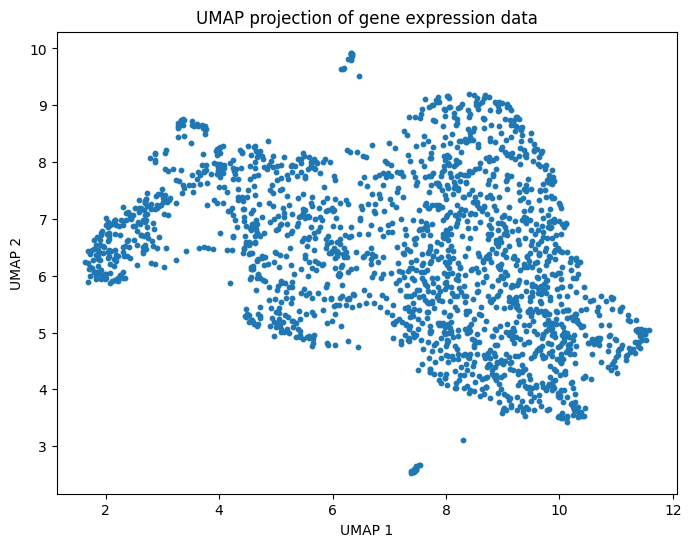

c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_25396\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


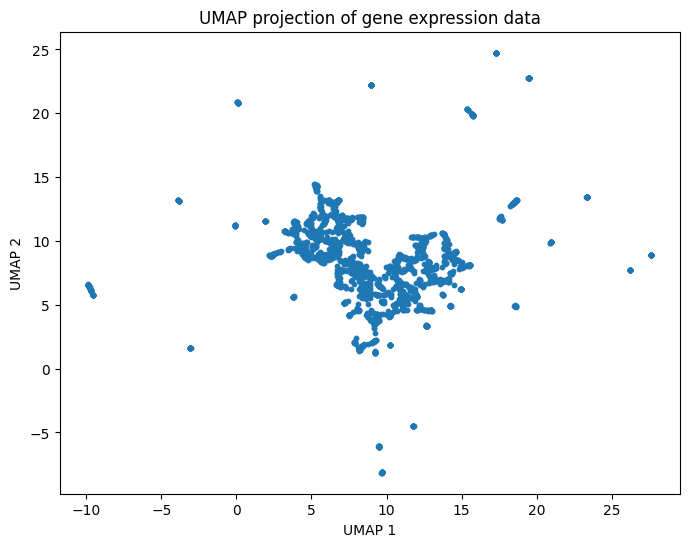

(None, None)

In [6]:
# original data exp and embedding after barlow_twins
umap_show(bulk), umap_show(embedding)

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_25396\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


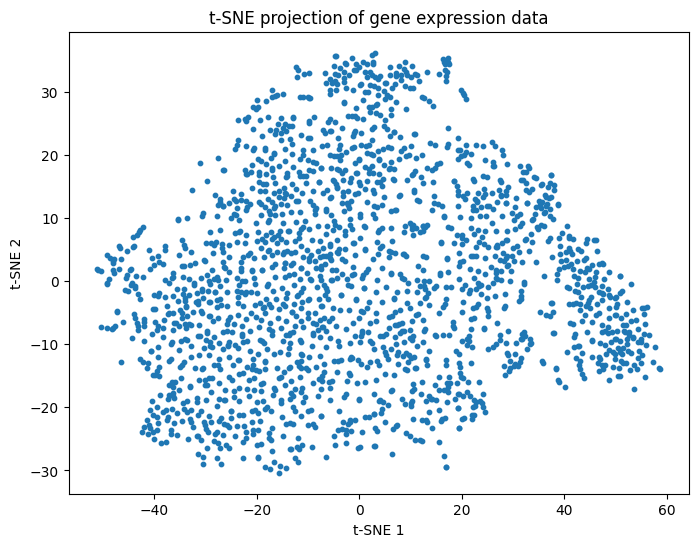

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_25396\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


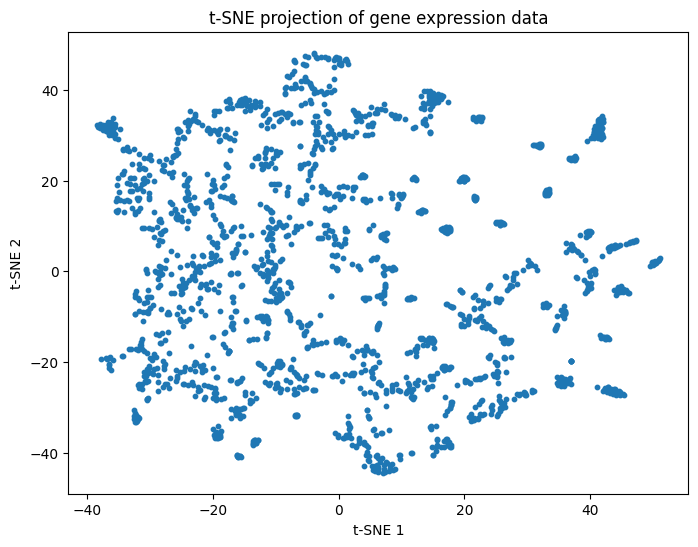

(None, None)

In [7]:
# original data exp and embedding after barlow_twins
tsne_show(bulk), tsne_show(embedding)

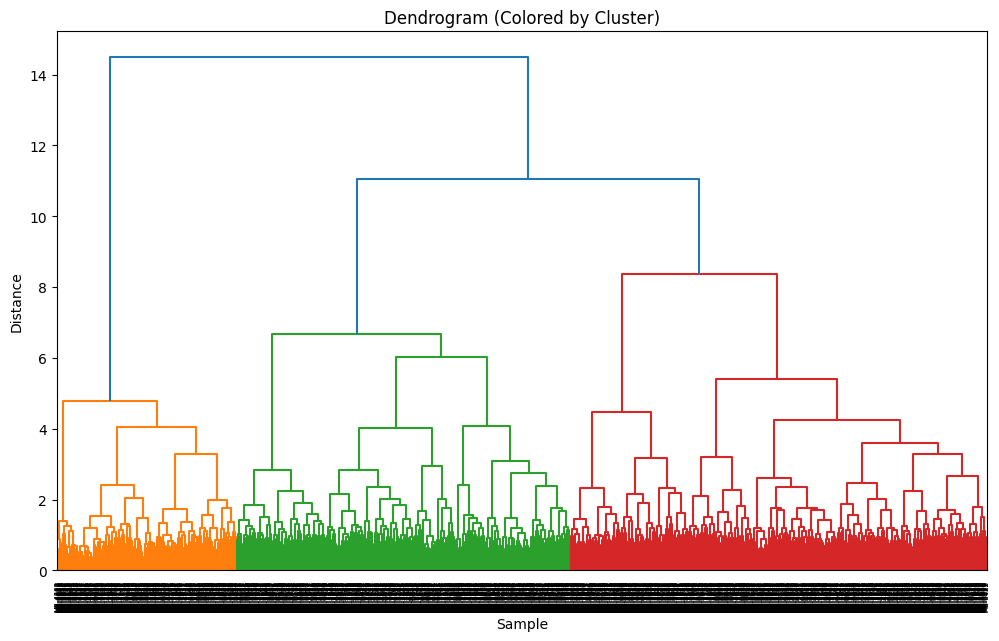

       Sample  Cluster_Label
0     MB-0000              2
1     MB-0002              2
2     MB-0005              2
3     MB-0006              2
4     MB-0008              3
...       ...            ...
1964  MB-7295              2
1965  MB-7296              3
1966  MB-7297              3
1967  MB-7298              3
1968  MB-7299              1

[1969 rows x 2 columns]


In [8]:
# original
cluster_label = hierarchical_clustering(bulk, metric = 'correlation', method = 'ward')

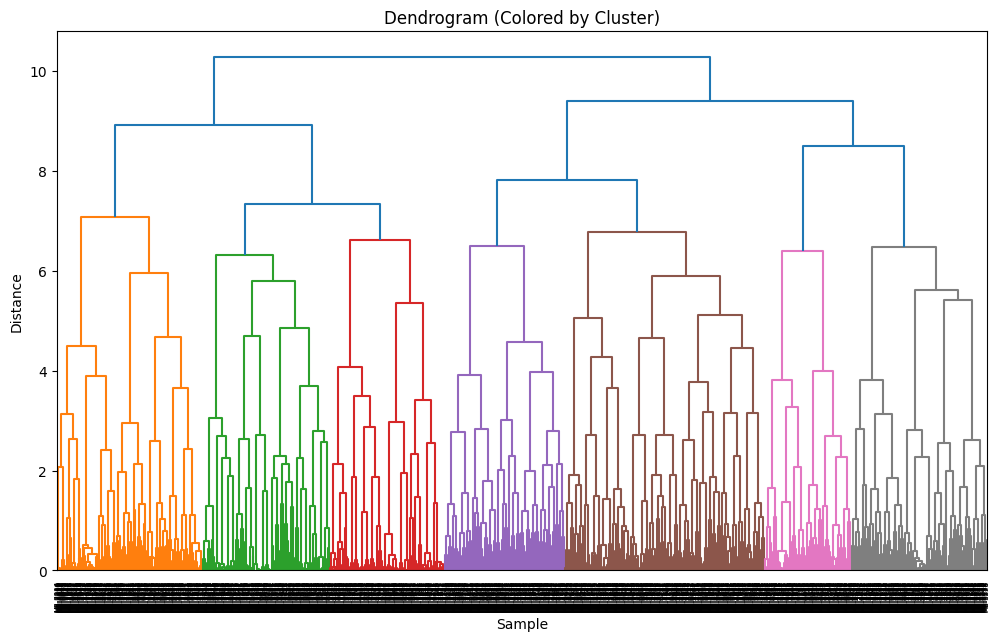

       Sample  Cluster_Label
0     MB-0000              5
1     MB-0002              4
2     MB-0005              5
3     MB-0006              1
4     MB-0008              3
...       ...            ...
1964  MB-7295              5
1965  MB-7296              1
1966  MB-7297              1
1967  MB-7298              1
1968  MB-7299              1

[1969 rows x 2 columns]


In [9]:
# after barlow twins
embedding_label = hierarchical_clustering(embedding, metric = 'correlation', method = 'ward')

In [10]:
cluster_label['Cluster_Label'].value_counts()

3    882
2    707
1    380
Name: Cluster_Label, dtype: int64

In [11]:
pam50_path = '../Synapse_metabric/Complete_METABRIC_Clinical_Features_Data.txt'
pam50 = pd.read_csv(pam50_path, index_col=0, sep=',', on_bad_lines='skip')

In [12]:
pam50.columns

Index(['age_at_diagnosis', 'size', 'lymph_nodes_positive', 'grade',
       'histological_type', 'ER_IHC_status', 'ER.Expr', 'PR.Expr',
       'HER2_IHC_status', 'HER2_SNP6_state', 'Her2.Expr', 'Treatment',
       'NOT_IN_OSLOVAL_menopausal_status_inferred', 'NOT_IN_OSLOVAL_group',
       'NOT_IN_OSLOVAL_stage', 'NOT_IN_OSLOVAL_lymph_nodes_removed',
       'NOT_IN_OSLOVAL_NPI', 'NOT_IN_OSLOVAL_cellularity',
       'NOT_IN_OSLOVAL_P53_mutation_status',
       'NOT_IN_OSLOVAL_P53_mutation_type',
       'NOT_IN_OSLOVAL_P53_mutation_details', 'NOT_IN_OSLOVAL_Pam50Subtype',
       'NOT_IN_OSLOVAL_IntClustMemb', 'NOT_IN_OSLOVAL_Site',
       'NOT_IN_OSLOVAL_Genefu'],
      dtype='object')

In [13]:
pam50 = pam50[['NOT_IN_OSLOVAL_Pam50Subtype']]

In [14]:
cluster_label.set_index('Sample', inplace=True)
embedding_label.set_index('Sample', inplace=True)

In [15]:
common_index = cluster_label.index.intersection(pam50.index)
cluster_label = cluster_label.loc[common_index]
embedding_label = embedding_label.loc[common_index]
pam50 = pam50.loc[common_index]

In [16]:
pam50

,NOT_IN_OSLOVAL_Pam50Subtype
MB-0000,Normal
MB-0005,LumB
MB-0006,LumB
MB-0008,LumB
MB-0010,LumB
...,...
MB-7295,LumA
MB-7296,LumB
MB-7297,LumB
MB-7298,LumB


In [17]:
cluster_label

,Cluster_Label
MB-0000,2
MB-0005,2
MB-0006,2
MB-0008,3
MB-0010,2
...,...
MB-7295,2
MB-7296,3
MB-7297,3
MB-7298,3


In [18]:
embedding_label.columns = ['embedding_label']
embedding_label

,embedding_label
MB-0000,5
MB-0005,5
MB-0006,1
MB-0008,3
MB-0010,1
...,...
MB-7295,5
MB-7296,1
MB-7297,1
MB-7298,1


In [19]:
df = pd.concat([pam50, cluster_label, embedding_label], axis=1, join='inner')
df.to_csv('../result/pam50_analysis.csv')

In [20]:
df

,NOT_IN_OSLOVAL_Pam50Subtype,Cluster_Label,embedding_label
MB-0000,Normal,2,5
MB-0005,LumB,2,5
MB-0006,LumB,2,1
MB-0008,LumB,3,3
MB-0010,LumB,2,1
...,...,...,...
MB-7295,LumA,2,5
MB-7296,LumB,3,1
MB-7297,LumB,3,1
MB-7298,LumB,3,1


In [21]:
LumA = df[df['NOT_IN_OSLOVAL_Pam50Subtype'].isin(['LumA'])]
LumB = df[df['NOT_IN_OSLOVAL_Pam50Subtype'].isin(['LumB'])]
Luminal = df[df['NOT_IN_OSLOVAL_Pam50Subtype'].isin(['LumA','LumB'])]
Basal = df[df['NOT_IN_OSLOVAL_Pam50Subtype'].isin(['Basal'])]
Her2 = df[df['NOT_IN_OSLOVAL_Pam50Subtype'].isin(['Her2'])]

In [22]:
LumA['Cluster_Label'].value_counts(), LumA['embedding_label'].value_counts()

(2    395
 3    269
 1     41
 Name: Cluster_Label, dtype: int64,
 7    140
 6    138
 4    129
 3    105
 5     95
 1     79
 2     19
 Name: embedding_label, dtype: int64)

In [23]:
LumB['Cluster_Label'].value_counts(), LumB['embedding_label'].value_counts()

(3    303
 2    109
 1     54
 Name: Cluster_Label, dtype: int64,
 4    132
 7     91
 1     84
 6     76
 5     44
 3     22
 2     17
 Name: embedding_label, dtype: int64)

In [24]:
Luminal['Cluster_Label'].value_counts(), Luminal['embedding_label'].value_counts()

(3    572
 2    504
 1     95
 Name: Cluster_Label, dtype: int64,
 4    261
 7    231
 6    214
 1    163
 5    139
 3    127
 2     36
 Name: embedding_label, dtype: int64)

In [25]:
Basal['Cluster_Label'].value_counts(), Basal['embedding_label'].value_counts()

(1    149
 3    113
 2     39
 Name: Cluster_Label, dtype: int64,
 2    142
 1     89
 5     34
 7     17
 3      9
 4      6
 6      4
 Name: embedding_label, dtype: int64)

In [26]:
Her2['Cluster_Label'].value_counts(), Her2['embedding_label'].value_counts()

(3    118
 1     89
 2     21
 Name: Cluster_Label, dtype: int64,
 1    100
 2     45
 3     25
 7     21
 4     20
 5     11
 6      6
 Name: embedding_label, dtype: int64)